In [ ]:
#importing the required libraries
import numpy as np
import os
import time
#importing the VGG16 model on which we wll trsin ourr data
# from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50
from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input, decode_predictions
#importing the layes like input layers hidden layers and the  output layers
from keras.layers import Dense, Activation, Flatten
#from keras.layers import merge, Input
from keras.models import Model
from keras.utils import to_categorical
from sklearn.utils import shuffle
#importing thee library to split our data in training and testing data
from sklearn.model_selection import train_test_split
# from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD, Adamax
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.applications import VGG16
from keras import layers
from keras import Model, Input
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import torchvision.models as models
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/debusa')

In [ ]:
training_data = ('/content/drive/MyDrive/debusa/training')
validation_data = ('/content/drive/MyDrive/debusa/validation')
testing_data = ('/content/drive/MyDrive/debusa/testing')

In [ ]:
#Apel
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Apel')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Brokoli
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Brokoli')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Jeruk
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Jeruk')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Kangkung
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Kangkung')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Mangga
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Mangga')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Pisang
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Pisang')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Strawberry
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Strawberry')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Terong
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Terong')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Toge
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Toge')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#Wortel
import os
folder_path = ('/content/drive/MyDrive/debusa/Training/Wortel')
test = os.listdir(folder_path)
# for fichier in test:
#     if not(fichier.endswith(".jpg")):
#         os.remove(os.path.join(folder_path, fichier))

In [ ]:
#cek label
from pathlib import Path
train_dir = Path('/content/drive/MyDrive/debusa/Training')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels
filepaths = list(train_dir.glob(r'**/*.jpg')) + list(train_dir.glob(r'**/*.JPG')) + list(train_dir.glob(r'**/*.jpeg'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))


In [ ]:
import pandas as pd
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
train_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
train_df = train_df.sample(frac=1).reset_index(drop = True)

# Show the result
train_df.head(5)

,Filepath,Label
0,/content/drive/MyDrive/debusa/Training/Brokoli...,Brokoli
1,/content/drive/MyDrive/debusa/Training/Toge/Sa...,Toge
2,/content/drive/MyDrive/debusa/Training/Strawbe...,Strawberry
3,/content/drive/MyDrive/debusa/Training/Brokoli...,Brokoli
4,/content/drive/MyDrive/debusa/Training/Toge/Sa...,Toge


In [ ]:
#cek label
from pathlib import Path
val_dir = Path('/content/drive/MyDrive/debusa/Validation')
test_dir = Path('/content/drive/MyDrive/debusa/Testing')

# Mendapatkan daftar filepaths dan labels untuk dataset dan data uji
#Get filepaths and labels data validation
filepaths_val = list(val_dir.glob(r'**/*.jpg')) + list(val_dir.glob(r'**/*.JPG')) + list(val_dir.glob(r'**/*.jpeg'))
labels_val = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_val))

#Get filepaths and labels data testing 1
filepaths_test = list(test_dir.glob(r'**/*.jpg')) + list(test_dir.glob(r'**/*.JPG')) + list(test_dir.glob(r'**/*.jpeg'))
labels_test = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_test))

In [ ]:
import pandas as pd
filepaths2 = pd.Series(filepaths_val, name='Filepath').astype(str)
labels2 = pd.Series(labels_val, name='Label')

# Concatenate filepaths and labels
validasi_df = pd.concat([filepaths2, labels2], axis=1)

# Shuffle the DataFrame and reset index
validasi_df = validasi_df.sample(frac=1).reset_index(drop = True)

# Show the result
validasi_df.head(15)

,Filepath,Label
0,/content/drive/MyDrive/debusa/Validation/Mangg...,Mangga
1,/content/drive/MyDrive/debusa/Validation/Broko...,Brokoli
2,/content/drive/MyDrive/debusa/Validation/Jeruk...,Jeruk
3,/content/drive/MyDrive/debusa/Validation/Toge/...,Toge
4,/content/drive/MyDrive/debusa/Validation/Mangg...,Mangga
5,/content/drive/MyDrive/debusa/Validation/Jeruk...,Jeruk
6,/content/drive/MyDrive/debusa/Validation/Apel/...,Apel
7,/content/drive/MyDrive/debusa/Validation/Broko...,Brokoli
8,/content/drive/MyDrive/debusa/Validation/Worte...,Wortel
9,/content/drive/MyDrive/debusa/Validation/Mangg...,Mangga


In [ ]:
import pandas as pd
filepaths3 = pd.Series(filepaths_test, name='Filepath').astype(str)
labels3 = pd.Series(labels_test, name='Label')

# Concatenate filepaths and labels
test_df = pd.concat([filepaths3, labels3], axis=1)

# Shuffle the DataFrame and reset index
test_df = test_df.sample(frac=1).reset_index(drop = True)

# Show the result
test_df.head(15)

,Filepath,Label
0,/content/drive/MyDrive/debusa/Testing/Apel/Sal...,Apel
1,/content/drive/MyDrive/debusa/Testing/Kangkung...,Kangkung
2,/content/drive/MyDrive/debusa/Testing/Brokoli/...,Brokoli
3,/content/drive/MyDrive/debusa/Testing/Brokoli/...,Brokoli
4,/content/drive/MyDrive/debusa/Testing/Pisang/S...,Pisang
5,/content/drive/MyDrive/debusa/Testing/Brokoli/...,Brokoli
6,/content/drive/MyDrive/debusa/Testing/Apel/Sal...,Apel
7,/content/drive/MyDrive/debusa/Testing/Strawber...,Strawberry
8,/content/drive/MyDrive/debusa/Testing/Kangkung...,Kangkung
9,/content/drive/MyDrive/debusa/Testing/Mangga/S...,Mangga


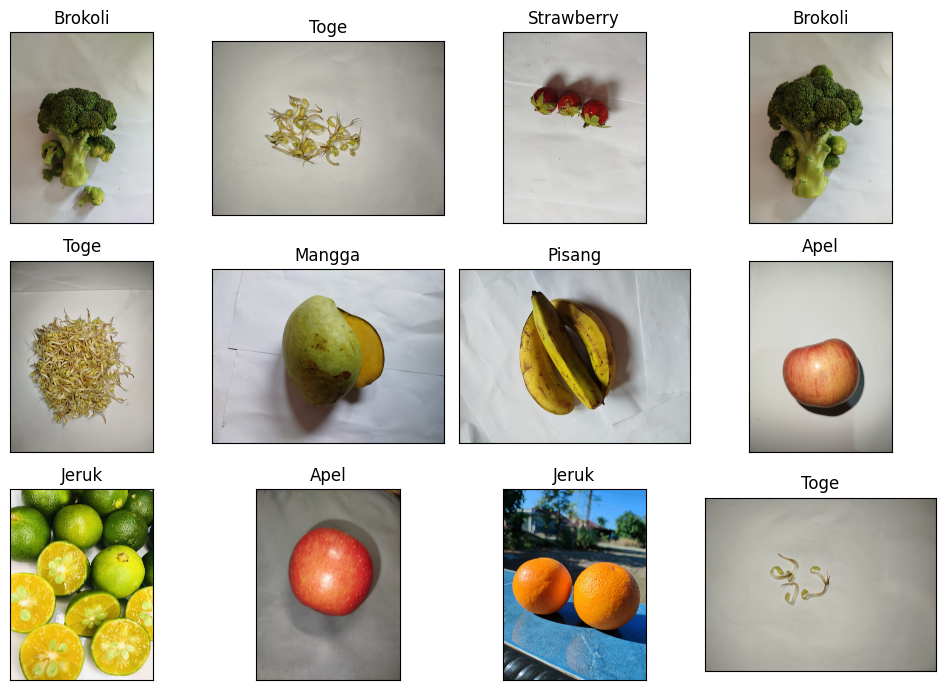

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.Filepath[i]))
    ax.set_title(train_df.Label[i])
plt.tight_layout()
plt.show()

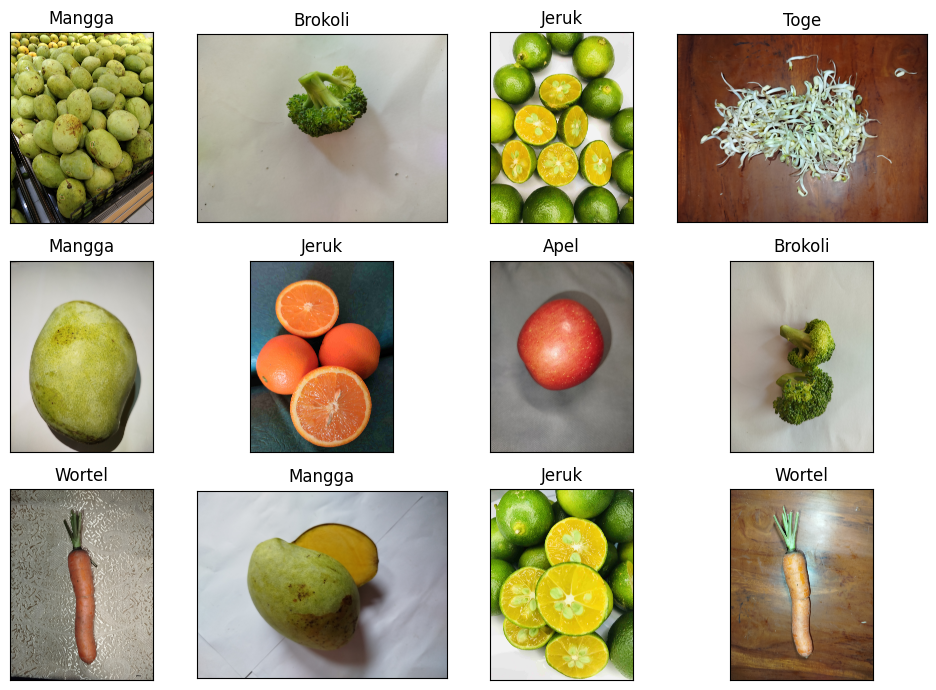

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(validasi_df.Filepath[i]))
    ax.set_title(validasi_df.Label[i])
plt.tight_layout()
plt.show()

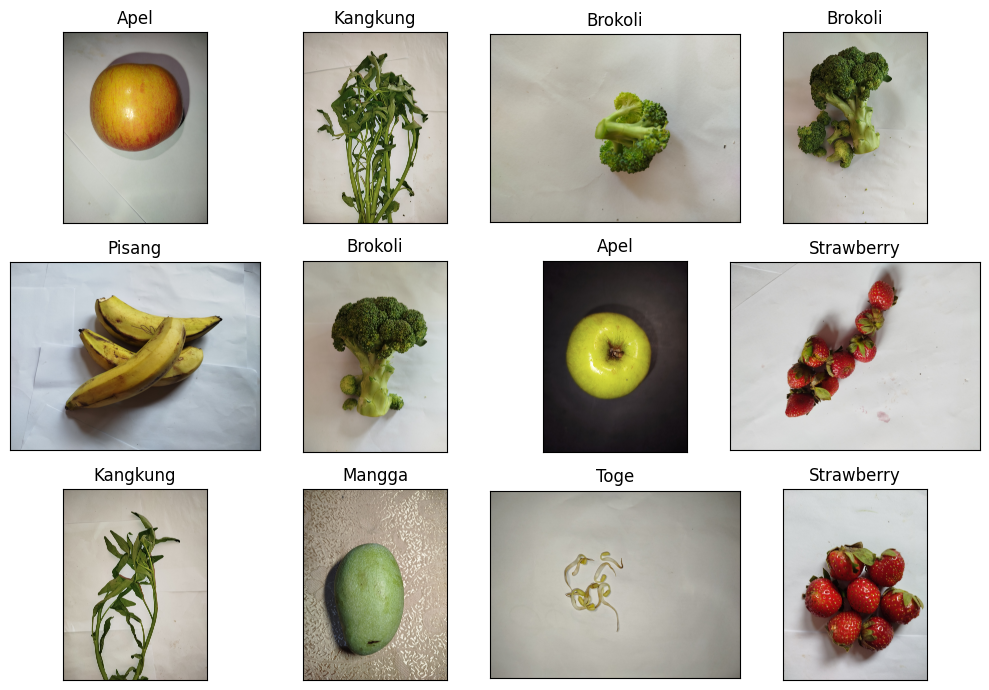

In [ ]:
# Menampilkan beberapa contoh dataset dari directory training
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath[i]))
    ax.set_title(test_df.Label[i])
plt.tight_layout()
plt.show()

<ipython-input-29-67f49b6db74c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


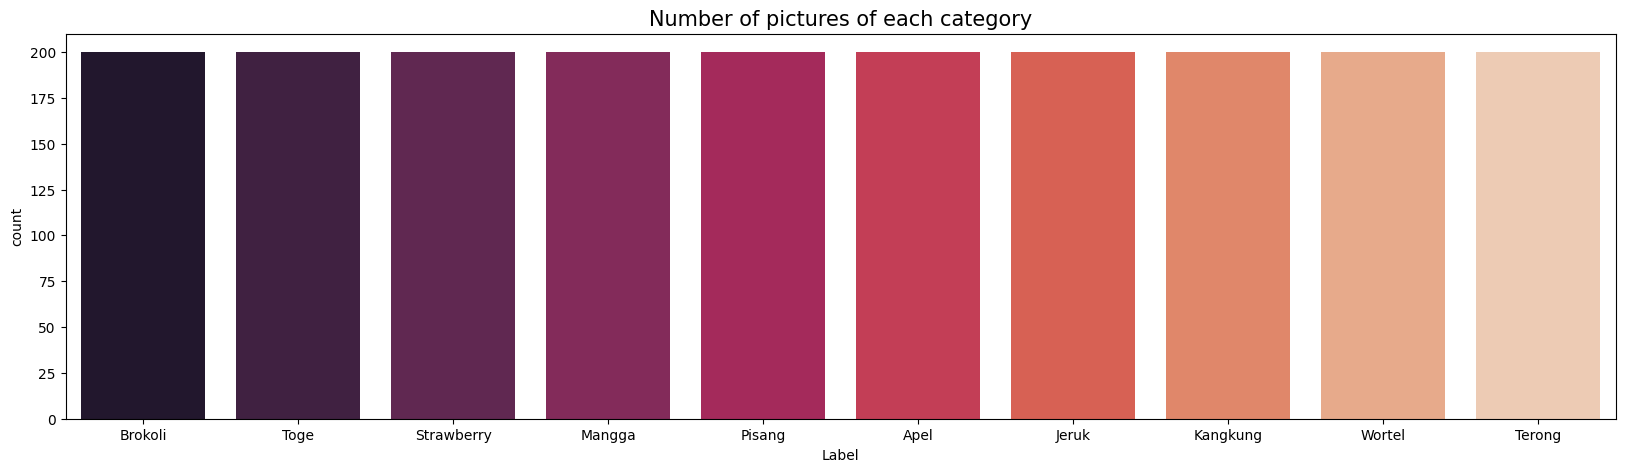

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = train_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-30-2118e4bb8752>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


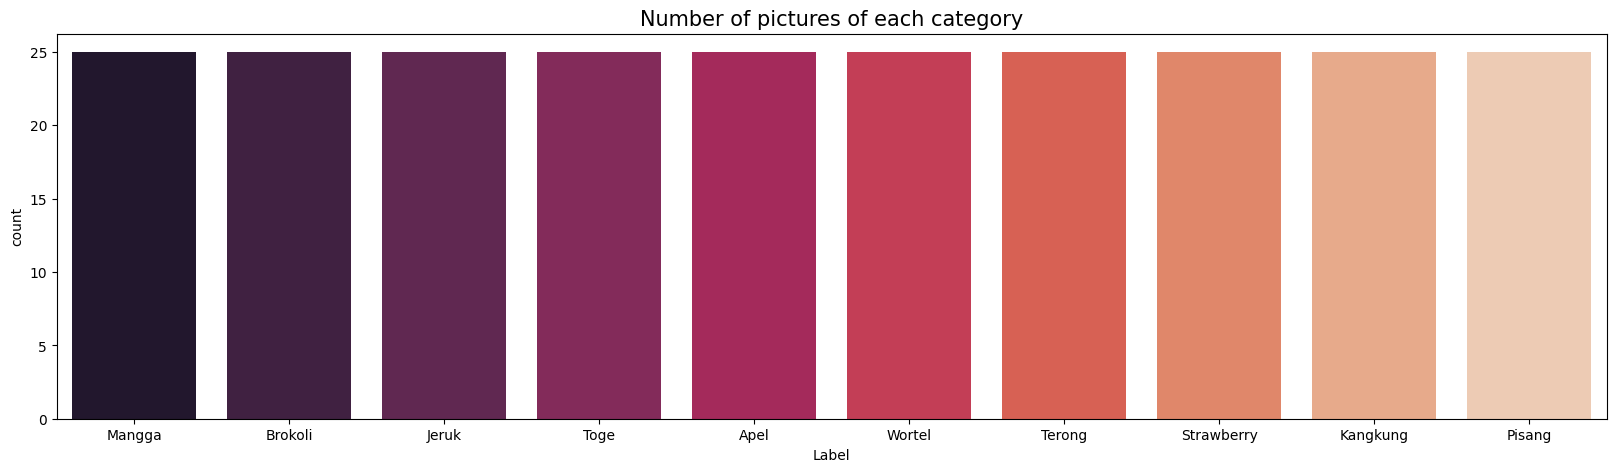

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = validasi_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

<ipython-input-31-321982c41b0e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = vc.index, y = vc, palette = "rocket")


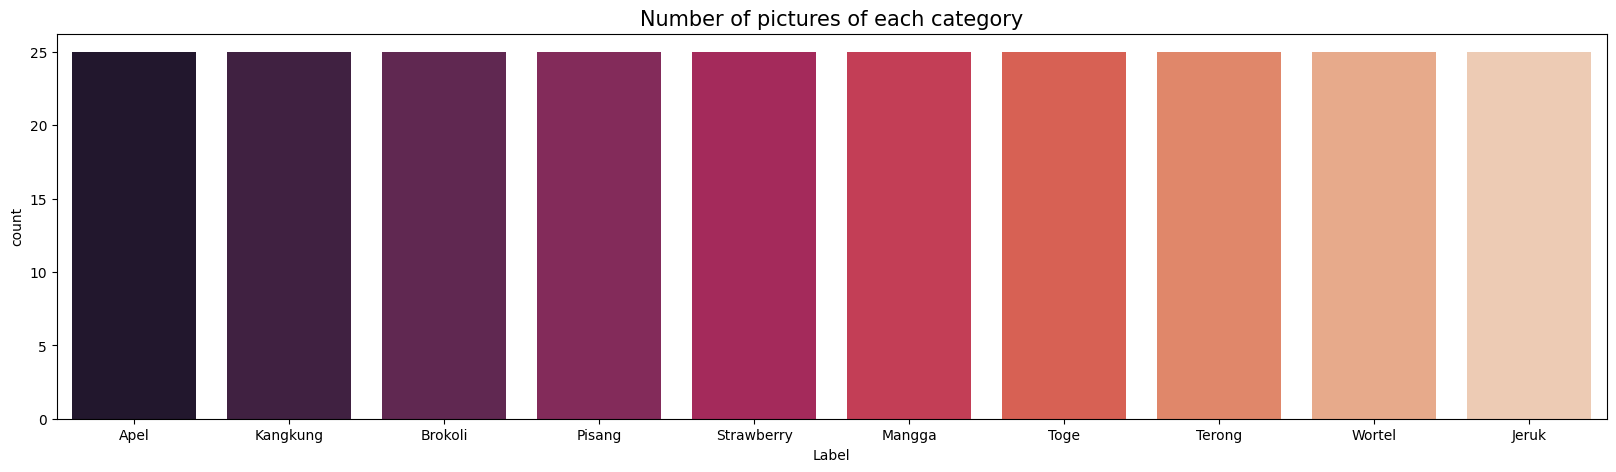

In [ ]:
# Display the number of pictures of each category
import seaborn as sns
vc = test_df['Label'].value_counts()
plt.figure(figsize=(20,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [ ]:
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, TensorBoard
# from keras.applications import VGG16
# from keras.models import Sequential
# from keras.layers import Dense, Flatten

# # Define callbacks
# checkpoint_callback = ModelCheckpoint(filepath='best_model.h5',
#                                       # save_best_only=True,
#                                       monitor='val_loss',
#                                       mode='min')

# tensorboard_callback = TensorBoard(log_dir='./logs', histogram_freq=1)

# # Create ImageDataGenerators
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
#                                                x_col='Filepath',
#                                                y_col='Label',
#                                                target_size=(224, 224),
#                                                batch_size=batch_size,
#                                                shuffle=True,
#                                                class_mode='categorical')

# validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
#                                                 x_col='Filepath',
#                                                 y_col='Label',
#                                                 target_size=(224, 224),
#                                                 batch_size=batch_size,
#                                                 shuffle=False,
#                                                 class_mode='categorical')

# # Debugging: Check shape of the batches
# x_batch, y_batch = next(train_data)
# print("Shape of x_batch:", x_batch.shape)
# print("Shape of y_batch:", y_batch.shape)

# # Create and compile model
# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# VGG16_model = Sequential()
# VGG16_model.add(base_model)
# VGG16_model.add(Flatten())
# VGG16_model.add(Dense(256, activation='relu'))
# VGG16_model.add(Dense(10, activation='softmax'))

# VGG16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Calculate steps_per_epoch and validation_steps
# steps_per_epoch = train_data.n // batch_size
# validation_steps = validasi_data.n // batch_size

# # Fit model with try-except for detailed error message
# try:
#     vgg16_history = VGG16_model.fit(
#         train_data,
#         validation_data=validasi_data,
#         steps_per_epoch=steps_per_epoch,
#         validation_steps=validation_steps,
#         epochs=10,
#         callbacks=[checkpoint_callback, tensorboard_callback]
#     )
# except InvalidArgumentError as e:
#     print("Error during model fitting:", e)


In [ ]:
#data generator
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255
    )
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_dataframe(dataframe=train_df,
                                          x_col='Filepath',
                                          y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=True,
                                         class_mode = 'categorical',
                                         )

validasi_data = val_datagen.flow_from_dataframe(dataframe=validasi_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )


uji_data = test_datagen.flow_from_dataframe(dataframe=test_df,
                                        x_col='Filepath',
                                        y_col='Label',
                                         target_size=(224,224),
                                         batch_size=32,
                                         shuffle=False,
                                         class_mode = 'categorical',
                                         )

Found 2000 validated image filenames belonging to 10 classes.
Found 250 validated image filenames belonging to 10 classes.
Found 250 validated image filenames belonging to 10 classes.


In [ ]:
import tensorflow as tf
from keras import Model, Input
# Tentukan input shape yang sesuai untuk model VGG16
input_shape = (224, 224, 3)  # Sesuaikan dengan ukuran gambar yang Anda gunakan
model_input = tf.keras.Input(shape=input_shape)
batch_size=32

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout

# Gunakan pre-trained VGG16 tanpa bagian fully connected (include_top=False)
base_model = VGG16(weights="imagenet", include_top=False, input_tensor=model_input)

# Bekukan semua layer base_model
base_model.trainable = False

# Buat model lengkap dengan menambahkan lapisan-lapisan berikut
VGG16_model = tf.keras.models.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

#Kompilasi Model
optimizer = Adamax(learning_rate=0.0001)
VGG16_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
VGG16_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 27565386 (105.15 MB)
Trainable params: 12850698 (49.02 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import TensorBoard
import os
import tensorflow as tf

# Create a TensorBoard callback
tensorboard_callback = TensorBoard(log_dir="./logs", histogram_freq=1)

logs_dir = '/content/logs/'
if not os.path.exists(logs_dir):
    os.makedirs(logs_dir)

# Membuat objek TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir, histogram_freq=1)

In [ ]:
# Jika menggunakan Python, Anda bisa mencoba hal berikut untuk membersihkan cache
import os
import sys

# Hapus file bytecode (.pyc) yang mungkin sudah tidak valid
pyc_files = [f for f in os.listdir() if f.endswith('.pyc')]
for pyc_file in pyc_files:
    os.remove(pyc_file)

# Hapus modul TensorFlow dari cache
module_name = 'tensorflow'  # Sesuaikan dengan nama modul TensorFlow Anda
if module_name in sys.modules:
    del sys.modules[module_name]

In [ ]:
import os
import pickle
from tensorflow.keras.callbacks import Callback

class HistorySaverCallback(Callback):
    def __init__(self, modelname, history_dir):
        super().__init__()
        self.modelname = modelname
        self.history_dir = history_dir

        # Membuat direktori history jika belum ada
        if not os.path.exists(history_dir):
            os.mkdir(history_dir)

    def on_epoch_end(self, epoch, logs=None):
        # Menyimpan history setiap epoch
        file_path = os.path.join(self.history_dir, f"{self.modelname}_224_AdaMax_vgg16V4.{epoch:02d}.pkl")
        with open(file_path, 'wb') as file_pi:
            pickle.dump(self.model.history.history, file_pi)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Tentukan path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/debusa/Model/VGG16'

# Buat callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',  # Metrik yang akan dipantau
                                      save_best_only=True,  # Hanya menyimpan model terbaik
                                      save_weights_only=False,  # Menyimpan seluruh model
                                      mode='min',  # Mode pemantauan (misalnya, 'min', 'max', atau 'auto')
                                      verbose=2)  # Menampilkan pesan saat menyimpan

In [ ]:
callbacks= [checkpoint_callback, tensorboard_callback]
vgg16_history = VGG16_model.fit(
                  train_data,
                  validation_data=validasi_data,
                  steps_per_epoch=train_data.n/batch_size,
                  validation_steps=validasi_data.n/batch_size,
                  epochs=10,
                  callbacks=callbacks)

Epoch 1/10
14/62 [=====>........................] - ETA: 19:58 - loss: 1.4996 - accuracy: 0.5580

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -12s - loss: 0.6429 - accuracy: 0.8385
Epoch 1: loss improved from inf to 0.64286, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1782s 28s/step - loss: 0.6429 - accuracy: 0.8385 - val_loss: 0.2232 - val_accuracy: 0.9640
Epoch 2/10
 6/62 [=>............................] - ETA: 19:51 - loss: 0.1806 - accuracy: 0.9635

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.1541 - accuracy: 0.9740
Epoch 2: loss improved from 0.64286 to 0.15409, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1598s 25s/step - loss: 0.1541 - accuracy: 0.9740 - val_loss: 0.1391 - val_accuracy: 0.9800
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.0977 - accuracy: 0.9845
Epoch 3: loss improved from 0.15409 to 0.09767, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1603s 25s/step - loss: 0.0977 - accuracy: 0.9845 - val_loss: 0.0951 - val_accuracy: 0.9800
Epoch 4/10
48/62 [======================>.......] - ETA: 5:14 - loss: 0.0693 - accuracy: 0.9908

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.0663 - accuracy: 0.9915
Epoch 4: loss improved from 0.09767 to 0.06632, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1589s 25s/step - loss: 0.0663 - accuracy: 0.9915 - val_loss: 0.0764 - val_accuracy: 0.9880
Epoch 5/10


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.0485 - accuracy: 0.9965
Epoch 5: loss improved from 0.06632 to 0.04846, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1658s 26s/step - loss: 0.0485 - accuracy: 0.9965 - val_loss: 0.0645 - val_accuracy: 0.9840
Epoch 6/10
 2/62 [..............................] - ETA: 31:37 - loss: 0.0460 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -11s - loss: 0.0395 - accuracy: 0.9985
Epoch 6: loss improved from 0.04846 to 0.03951, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1582s 25s/step - loss: 0.0395 - accuracy: 0.9985 - val_loss: 0.0563 - val_accuracy: 0.9840
Epoch 7/10
16/62 [======>.......................] - ETA: 17:33 - loss: 0.0344 - accuracy: 0.9980

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.0320 - accuracy: 0.9980
Epoch 7: loss improved from 0.03951 to 0.03196, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1592s 25s/step - loss: 0.0320 - accuracy: 0.9980 - val_loss: 0.0562 - val_accuracy: 0.9840
Epoch 8/10
15/62 [======>.......................] - ETA: 17:08 - loss: 0.0284 - accuracy: 0.9979

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.0261 - accuracy: 0.9995
Epoch 8: loss improved from 0.03196 to 0.02612, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1592s 25s/step - loss: 0.0261 - accuracy: 0.9995 - val_loss: 0.0485 - val_accuracy: 0.9840
Epoch 9/10
 7/62 [==>...........................] - ETA: 21:38 - loss: 0.0160 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -11s - loss: 0.0226 - accuracy: 0.9995
Epoch 9: loss improved from 0.02612 to 0.02259, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1617s 26s/step - loss: 0.0226 - accuracy: 0.9995 - val_loss: 0.0470 - val_accuracy: 0.9840
Epoch 10/10
21/62 [=========>....................] - ETA: 15:15 - loss: 0.0186 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


63/62 [==============================] - ETA: -10s - loss: 0.0182 - accuracy: 1.0000
Epoch 10: loss improved from 0.02259 to 0.01823, saving model to /content/drive/MyDrive/debusa/Model/VGG16
62/62 [==============================] - 1586s 25s/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0389 - val_accuracy: 0.9920


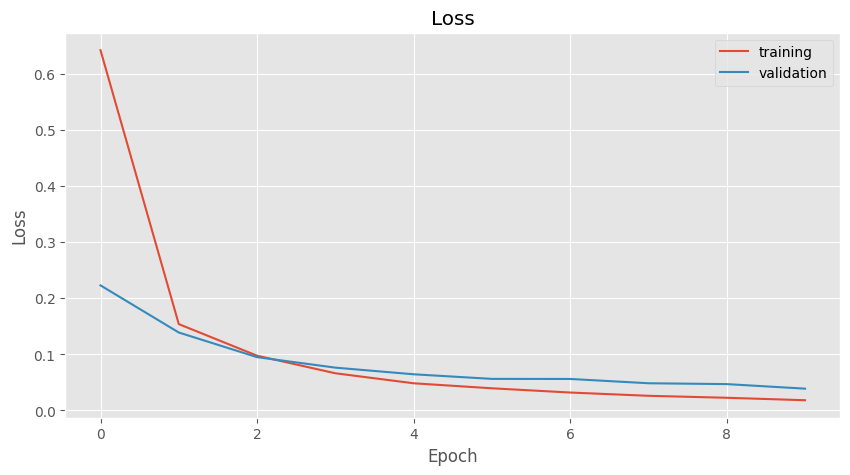

In [ ]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10), vgg16_history.history["loss"], label="training")
plt.plot(np.arange(0, 10), vgg16_history.history["val_loss"], label="validation")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

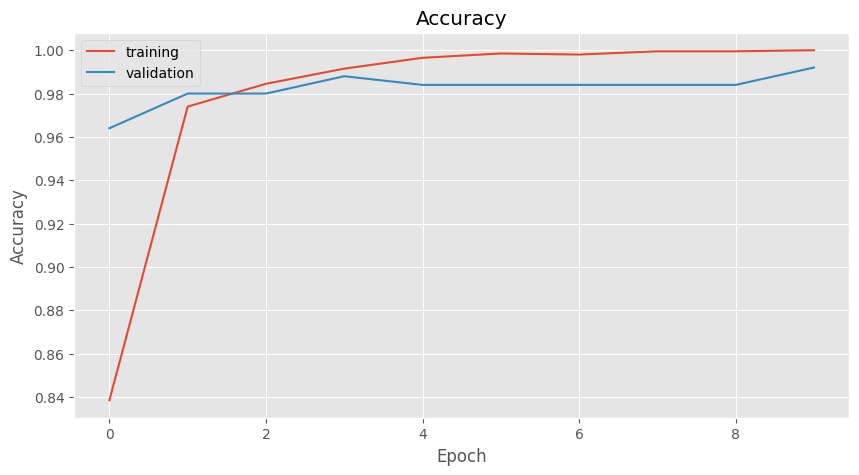

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(0, 10), vgg16_history.history["accuracy"], label="training")
plt.plot(np.arange(0, 10), vgg16_history.history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:

import tensorflow as tf
adamax_vgg_model = tf.keras.models.load_model('/content/drive/MyDrive/debusa/Model/VGG16')

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop
#compile model
optimizer = Adamax(learning_rate=0.0001)
adamax_vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# Predict the label of the test_images
import numpy as np
pred_test = adamax_vgg_model.predict(uji_data)
pred_test = np.argmax(pred_test,axis=1)

# Map the label
labels = (uji_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred_test = [labels[k] for k in pred_test]

# Display the result
print(f'The first 5 predictions: {pred_test[:4]}')

6/8 [=====================>........] - ETA: 54s 

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


8/8 [==============================] - 200s 25s/step
The first 5 predictions: ['Apel', 'Kangkung', 'Brokoli', 'Brokoli']


In [ ]:
metrics_test = adamax_vgg_model.evaluate(uji_data)

8/8 [==============================] - 171s 20s/step - loss: 0.0497 - accuracy: 0.9920


In [ ]:
#classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = list(test_df.Label)
print(classification_report(y_test, pred_test, digits=5))

              precision    recall  f1-score   support

        Apel    1.00000   0.96000   0.97959        25
     Brokoli    1.00000   1.00000   1.00000        25
       Jeruk    0.96154   1.00000   0.98039        25
    Kangkung    0.96154   1.00000   0.98039        25
      Mangga    1.00000   1.00000   1.00000        25
      Pisang    1.00000   1.00000   1.00000        25
  Strawberry    1.00000   1.00000   1.00000        25
      Terong    1.00000   0.96000   0.97959        25
        Toge    1.00000   1.00000   1.00000        25
      Wortel    1.00000   1.00000   1.00000        25

    accuracy                        0.99200       250
   macro avg    0.99231   0.99200   0.99200       250
weighted avg    0.99231   0.99200   0.99200       250



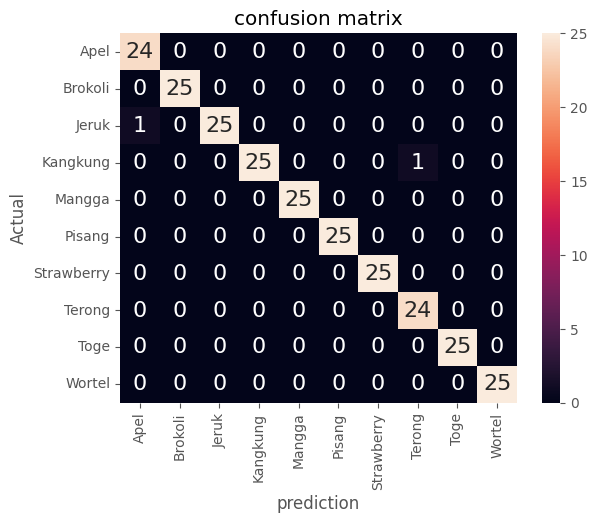

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
cm  = confusion_matrix(pred_test,y_test)

# Ambil nama kelas dari generator data
class_names = list(uji_data.class_indices.keys())
# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, fmt='d')
plt.title('confusion matrix')
plt.xlabel('prediction')
plt.ylabel('Actual');

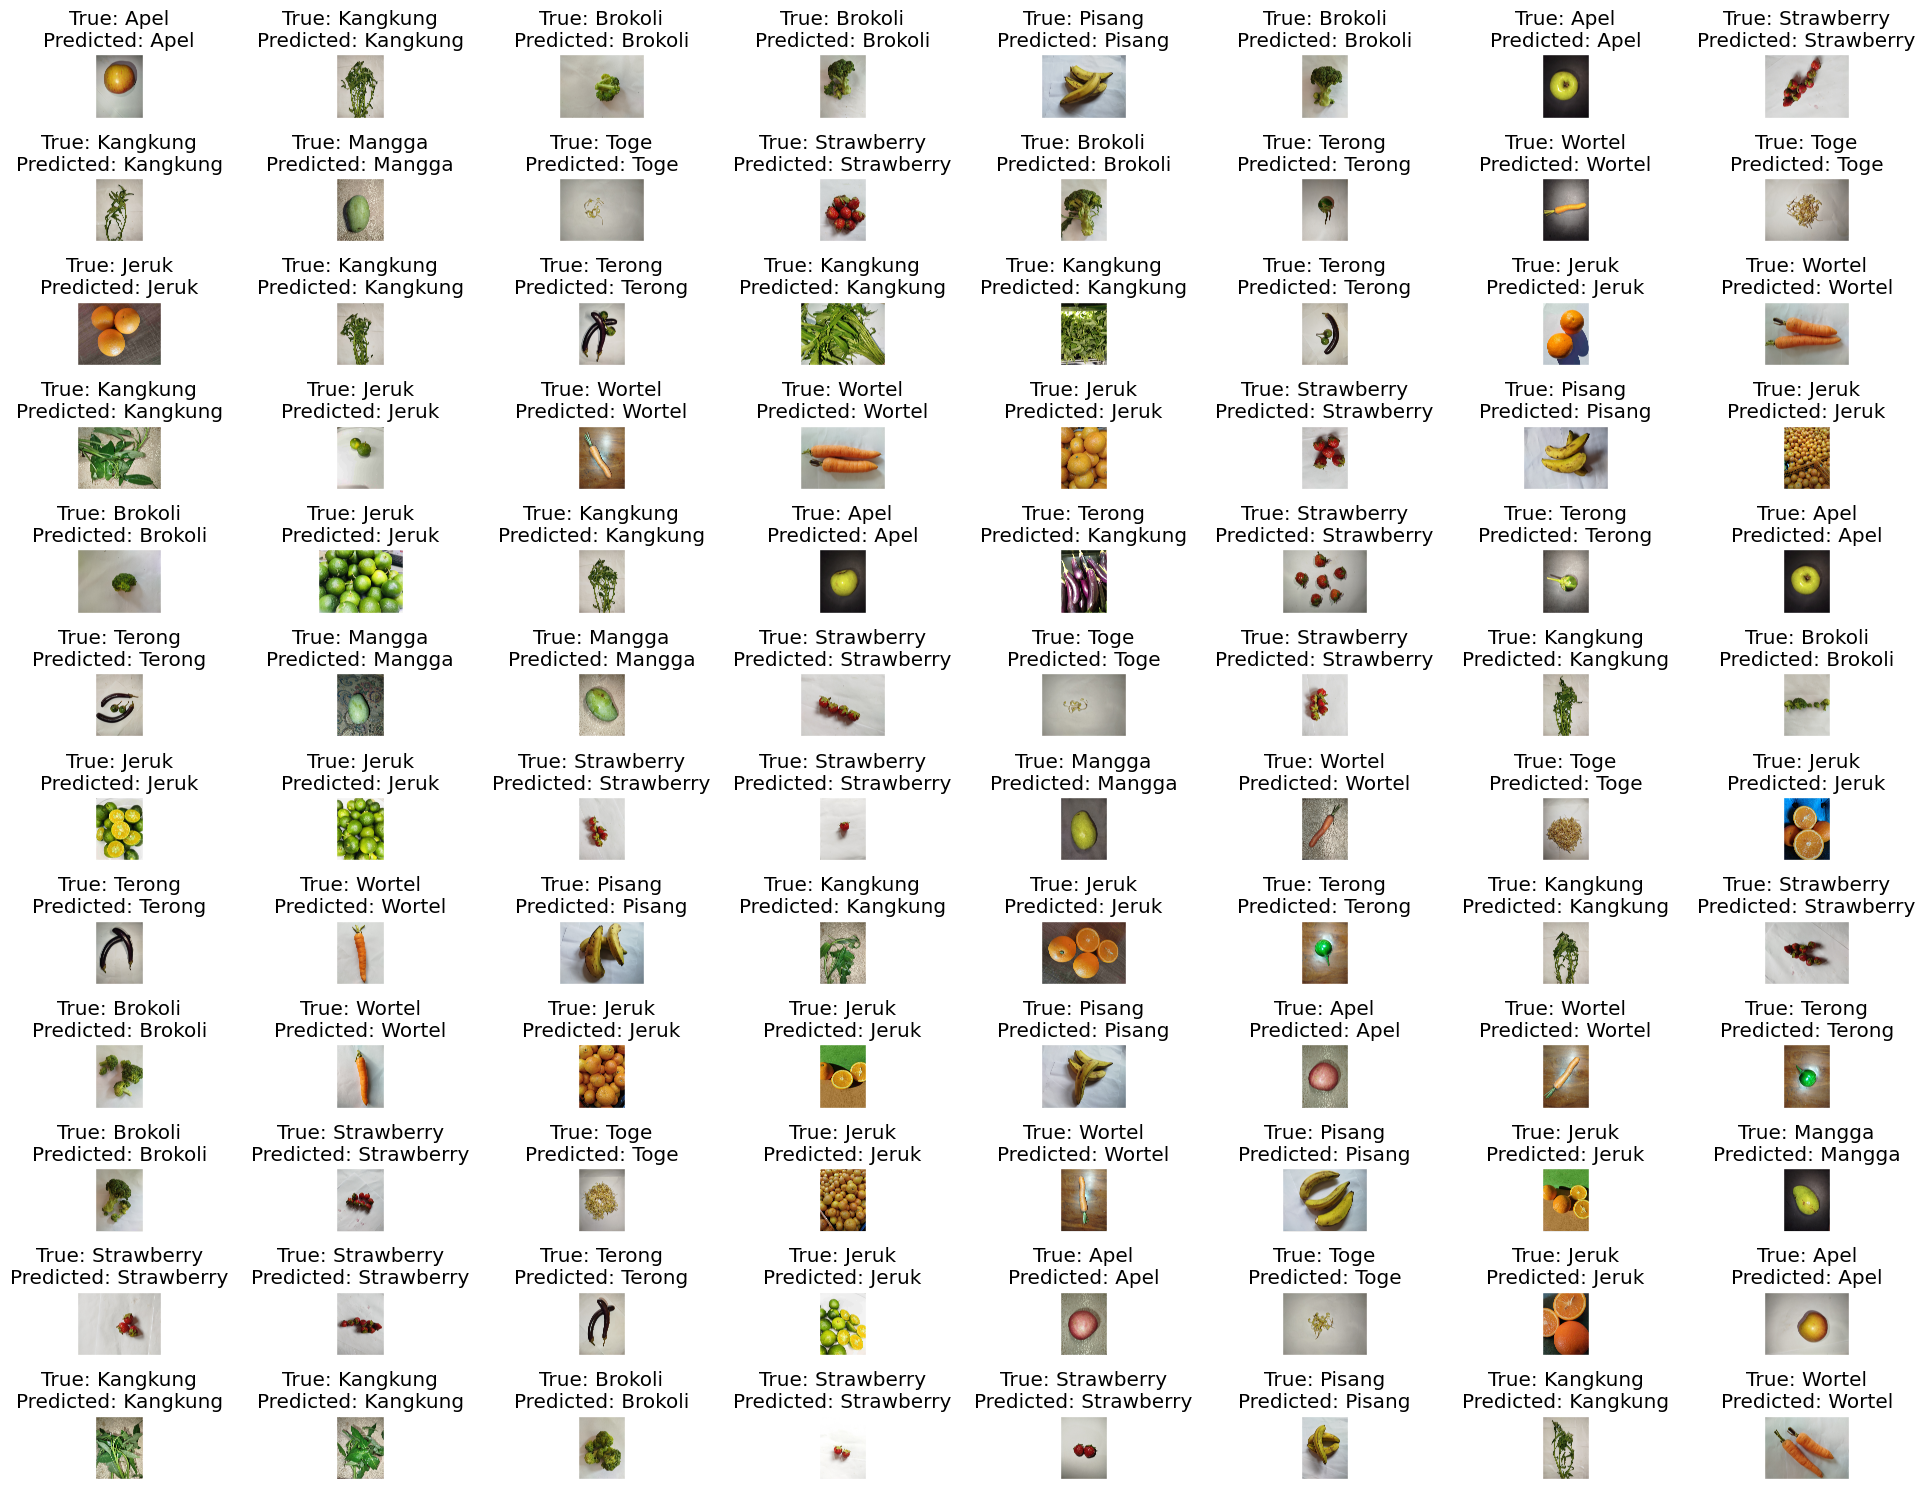

In [ ]:
# Display some pictures of the dataset with their labels and the predictions
fig, axes = plt.subplots(nrows=12, ncols=8, figsize=(20, 15),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test_df.Filepath.iloc[i]))
    ax.set_title(f"True: {test_df.Label.iloc[i]}\nPredicted: {pred_test[i]}")
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
import os
from google.colab import files

# Load trained model
model = tf.keras.models.load_model("/content/drive/MyDrive/debusa/Model/VGG16")

# Path to directory containing class labels
train_dir = "/content/drive/MyDrive/debusa/Training"
class_list = sorted(os.listdir(train_dir))

# Function to process image and make prediction
def predict_image(img):
    # Preprocess image
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values

    # Perform prediction
    predictions = model.predict(x)

    # Get predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_list[predicted_class_index]

    return predicted_class, predictions[0]

# Upload image
uploaded = files.upload()

# Process and predict class label for each uploaded image
for fn in uploaded.keys():
    # Load and preprocess uploaded image
    img = image.load_img(fn, target_size=(224, 224))

    # Predict class label
    predicted_class, confidence_scores = predict_image(img)

    # Display prediction result
    print("Image:", fn)
    print("Predicted Class:", predicted_class)
    print("Confidence Scores:", confidence_scores)
    print()



Saving triii.jpg to triii.jpg
1/1 [==============================] - 1s 655ms/step
Image: triii.jpg
Predicted Class: Toge
Confidence Scores: [2.0561485e-04 1.7770604e-04 2.4144337e-04 2.5809562e-04 3.6306628e-03
 5.2129442e-04 4.4120464e-04 4.8862380e-04 2.3793080e-04 9.9379748e-01]

